# Assignment 8

## Group members

- Erdem Halil - gushaliler@student.gu.se

#### Problem 1

In [191]:
def check_palindrome(input):
    # If the input is a string, convert to lowercase
    # If not, cast it to a string
    if isinstance(input, str):
        input = input.lower()
    else:
        input = str(input)

    # Split the input into two halves for stack and queue
    middle = len(input) // 2
    stack_half = input[:middle]
    queue_half = input[-middle:]    # If input length is an odd number, ignore the middle element

    # Create a stack and a queue
    # Both implemented as simple Python built-in lists
    stack = []
    queue = []

    # Push elements onto the stack
    for char in stack_half:
        stack.append(char)

    # Enqueue elements into the queue
    for char in queue_half:
        queue.append(char)

    # Compare elements from the stack and queue
    while stack and queue:
        if stack.pop() != queue.pop(0):
            return False
    
    return True


if __name__ == "__main__":
    # print("This program checks if your text is a palindrome!")
    # text = input(’Please enter your text: ’ )
    # check_palindrome(text)
    # True
    print("...True...")
    print(check_palindrome("tattarrattat"))
    print(check_palindrome("Able was I ere I saw Elba"))
    print(check_palindrome("jajjjjaj"))
    print(check_palindrome("jajjjaj"))
    print(check_palindrome("jaJjjaJ"))
    print(check_palindrome("1881"))
    print(check_palindrome("181"))
    # False
    print("...False...")
    print(check_palindrome("jaxxj"))
    print(check_palindrome("jajaja"))
    print(check_palindrome("18818"))

...True...
True
True
True
True
True
True
True
...False...
False
False
False


#### Problem 2

##### 1. What are the subjects that are particularly bad in terms of having high dropout?

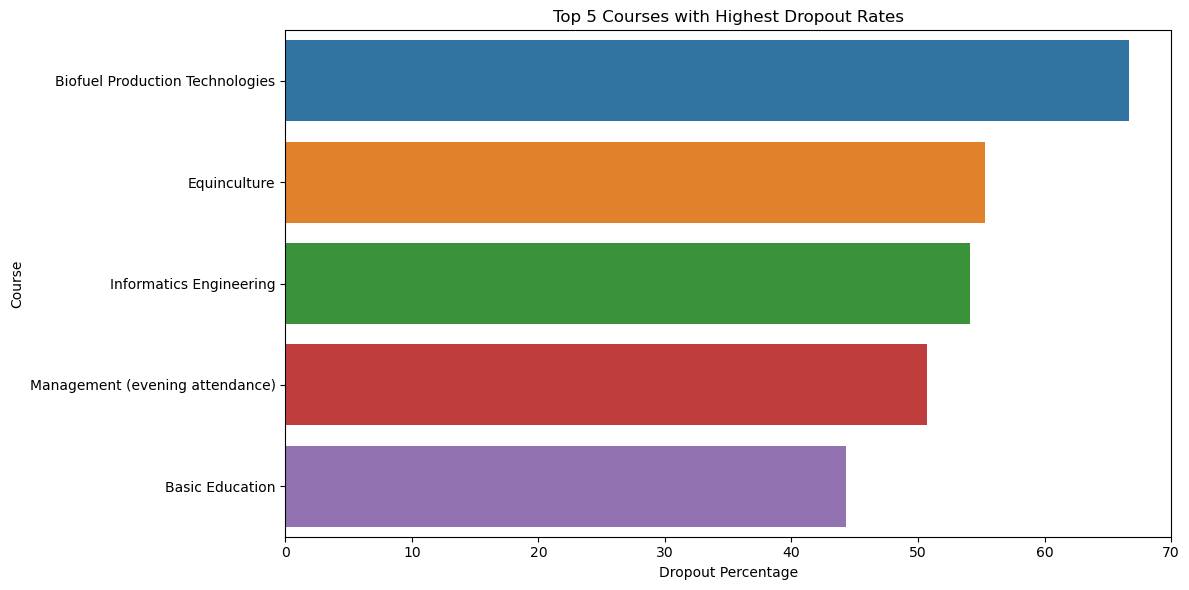

In [192]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

# Read the data
data = pd.read_csv("data.csv", sep=";")
data_info = pd.read_csv("Data_L15_info.csv", sep=",")

# Calculate dropout percentage per course
students_per_course = data.groupby("Course").size()
dropouts_per_course = data[data["Target"] == "Dropout"].groupby("Course").size()
# Sort courses by dropout rate in descending order
dropout_percentage = ((dropouts_per_course / students_per_course) * 100).sort_values(ascending=False)

# Extract course descriptions from info data so we can use it in the graph
course_descriptions = data_info[data_info["Attribute Name"] == "Course"]["Description"].iloc[0]
parts = re.split(r"(?=\b\d+ -)", course_descriptions)
course_map = {}
for part in parts:
    if "-" in part:
        code, name = [item.strip() for item in part.split("-")]
        course_map[int(code)] = name

# Create a dataframe to plot containing the string course name
dropout_df = pd.DataFrame({
    "course": dropout_percentage.index.map(course_map),
    "dropout_rate": dropout_percentage.values
})

# Plot the courses with the highest dropout rates
plt.figure(figsize=(12, 6))
sns.barplot(
    data=dropout_df.head(5),
    x = "dropout_rate",
    y = "course"
)
plt.title("Top 5 Courses with Highest Dropout Rates")
plt.xlabel("Dropout Percentage")
plt.ylabel("Course")
plt.tight_layout()
plt.show()

Steps taken to analyse data:
- Read and analyzed the structure of the provided data
- Noticed that the course names in the `data.csv` file were given as integers (IDs). I mapped them from `Data_L15_info.csv` so it is more presentable on the graph. 
- Calculated students per course and dropouts per course
- Sorted by dropout rate

Analysis shows that top 5 courses with highest dropout rates are:
- Biofuel Production Technologies -> `66.7%`
- Equinculture                    -> `55.3%`
- Informatics Engineering         -> `54.1%`
- Management (evening attendance) -> `50.8%`
- Basic Education                 -> `44.3%`

##### 2. What are the subjects that are particularly successful?

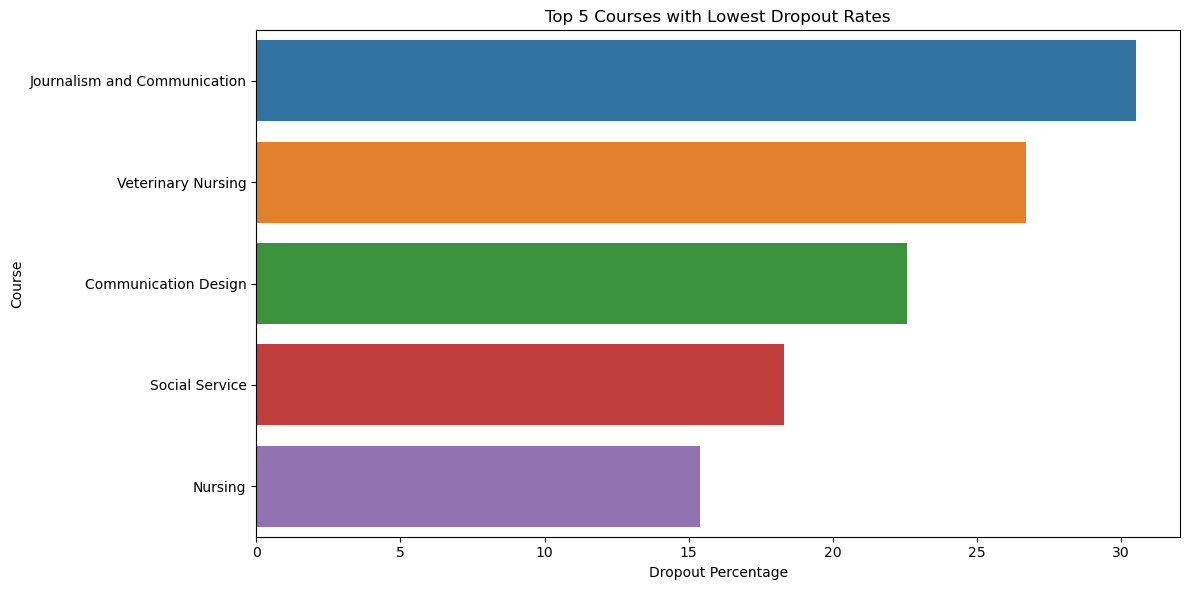

In [193]:
# Plot the courses with the lowest dropout rates
plt.figure(figsize=(12, 6))
sns.barplot(
    data=dropout_df.tail(5),
    x = "dropout_rate",
    y = "course"
)
plt.title("Top 5 Courses with Lowest Dropout Rates")
plt.xlabel("Dropout Percentage")
plt.ylabel("Course")
plt.tight_layout()
plt.show()

The question is ambiguous as it does not define what successful means in this case. I interpreted it as a continuation of the first question, so I have listed the courses with the lowest dropout rates.

I have used the same data as above. Just got the lowest 5 dropout rates out of all courses.

Analysis shows that top 5 courses with highest dropout rates are:
- Nursing                      -> `15.4%`
- Social Service               -> `18.3%`
- Communication Design         -> `22.6%`
- Veterinary Nursing           -> `26.7%`
- Journalism and Communication -> `30.5%`


##### 3. The institution wants to save resources by closing the evening classes. Does the data support for or against the institution’s plan?

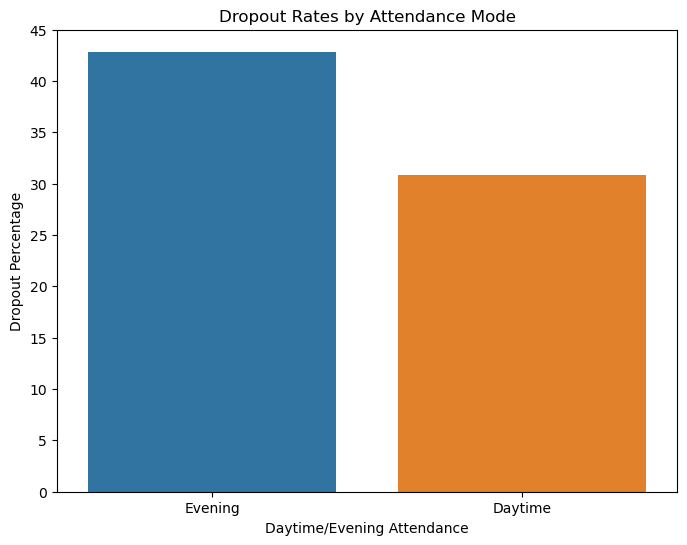

In [194]:
# Group data by Daytime/evening attendance and calculate dropout rates
attendance_dropout_rates = data[data["Target"] == "Dropout"].groupby("Daytime/evening attendance\t")["Target"].count() / data.groupby("Daytime/evening attendance\t")["Target"].count() * 100

# Plot the dropout rates for daytime and evening attendance
plt.figure(figsize=(8, 6))
sns.barplot(x=attendance_dropout_rates.index, y=attendance_dropout_rates.values)
plt.title("Dropout Rates by Attendance Mode")
plt.xlabel("Daytime/Evening Attendance")
plt.ylabel("Dropout Percentage")
plt.xticks(ticks=[0, 1], labels=["Evening", "Daytime"])
plt.show()

Steps taken for analysis:
- Group data by both evening and daytime attendance
- Calculate dropouts rates for both

Analysis shows that evening classes have an average dropout rate of `42.9%`, whereas this number for daytime classes is `30.8%`. This implies that students are more likely to drop out if they take evening classes and partially supports institution's plan but it is still worth to mention that more than half of the students continue with their studies and they will be negatively affected if they are not able to take daytime classes.


##### 4. Is there any correlation between ”Previous qualification (grade)” and ”Admission grade”? If so, how strong/how weak is the correlation?

Correlation: 0.5804441978785262


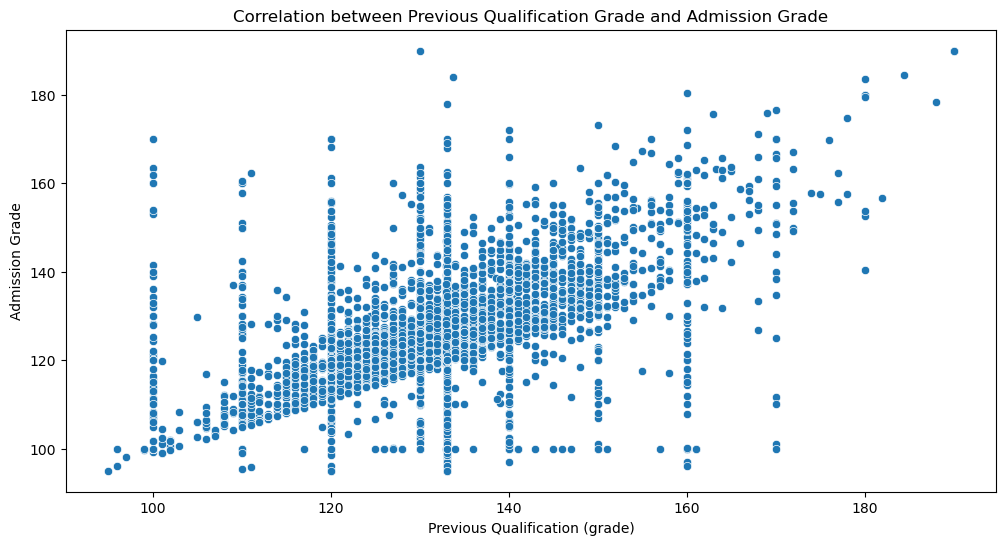

In [195]:
# Scatter plot and correlation calculation
plt.figure(figsize=(12, 6))
sns.scatterplot(x="Previous qualification (grade)", y="Admission grade", data=data)
plt.title("Correlation between Previous Qualification Grade and Admission Grade")
plt.xlabel("Previous Qualification (grade)")
plt.ylabel("Admission Grade")

correlation = data["Previous qualification (grade)"].corr(data["Admission grade"])
print("Correlation:", correlation)

The scatter plot presented suggests that there is a positive correlation between "Previous qualification grade" and "Admission grade". Although not strong, a correlation of 0.58 suggests a moderate relationship between them. Yet, it is important to note that correlation does not mean causation so there could be other factors causing this relationship to be correlated.

##### 5. How do the female and male students compare in terms of dropout?

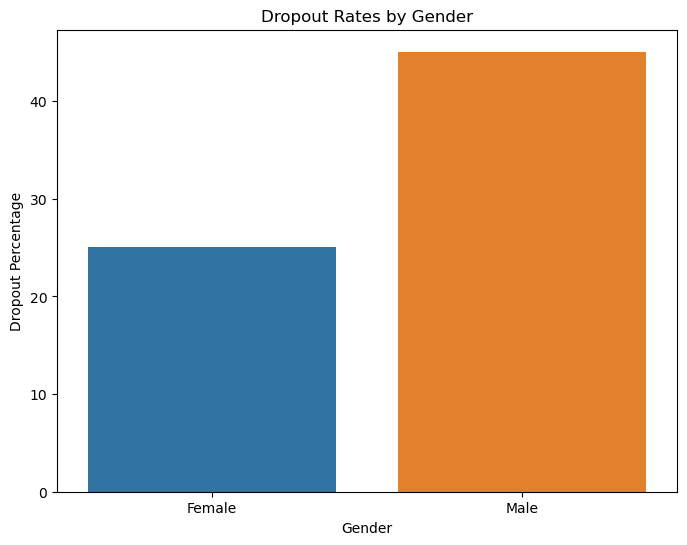

In [196]:
# Group data by gender and calculate dropout rates
gender_dropout_rates = data[data["Target"] == "Dropout"].groupby("Gender")["Target"].count() / data.groupby("Gender")["Target"].count() * 100

# Plot the dropout rates for female and male students
plt.figure(figsize=(8, 6))
sns.barplot(x=gender_dropout_rates.index, y=gender_dropout_rates.values)
plt.title("Dropout Rates by Gender")
plt.xlabel("Gender")
plt.ylabel("Dropout Percentage")
plt.xticks(ticks=[0, 1], labels=["Female", "Male"])
plt.show()

Steps taken for analysis:
- Group data by both genders
- Calculate dropouts rates for both

Analysis shows that female students have an average dropout rate of `25.1%`, whereas this number for males is `45%`. This implies that male students are more likely to drop out than females.


##### 6. What is the age at enrollment, at which we see a turning point from more graduate to more dropout?

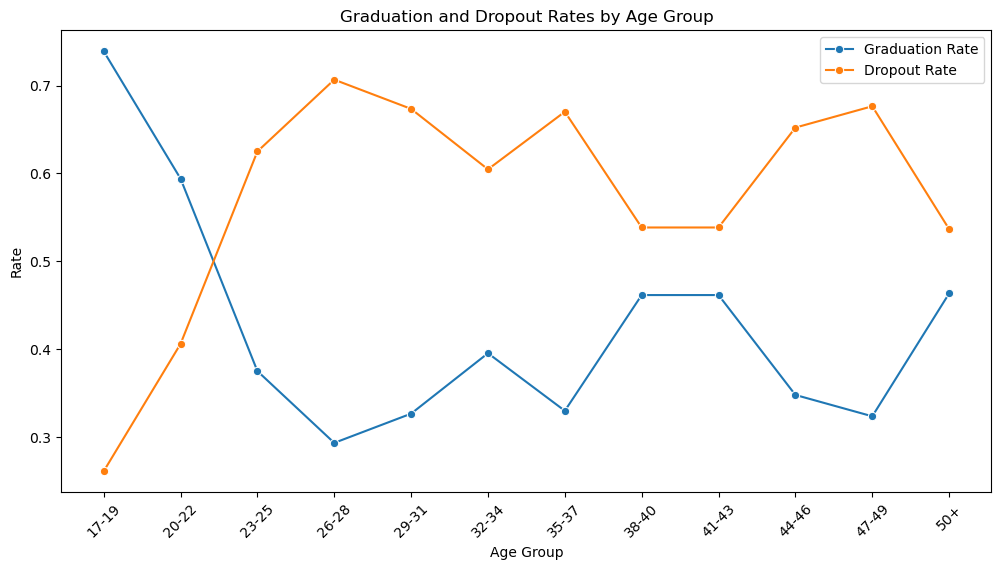

In [197]:
# Define age groups
age_bins = [17, 20, 23, 26, 29, 32, 35, 38, 41, 44, 47, 50, 100]
age_labels = ["17-19", "20-22", "23-25", "26-28", "29-31", "32-34", "35-37", "38-40", "41-43", "44-46", "47-49", "50+"]

# Create a new column with age groups
data["Age Group"] = pd.cut(data["Age at enrollment"], bins=age_bins, labels=age_labels)

# Calculate graduation rates and dropout rates for each age group
age_group_rates = data.groupby(["Age Group", "Target"]).size().unstack()
age_group_rates["Total"] = age_group_rates["Graduate"] + age_group_rates["Dropout"]
age_group_rates["Graduation Rate"] = age_group_rates["Graduate"] / age_group_rates["Total"]
age_group_rates["Dropout Rate"] = age_group_rates["Dropout"] / age_group_rates["Total"]

# Plot the graduation rate and dropout rate against age
plt.figure(figsize=(12, 6))
sns.lineplot(data=age_group_rates, x=age_labels, y="Graduation Rate", label="Graduation Rate", marker="o")
sns.lineplot(data=age_group_rates, x=age_labels, y="Dropout Rate", label="Dropout Rate", marker="o")
plt.title("Graduation and Dropout Rates by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Rate")
plt.xticks(rotation=45)
plt.legend()
plt.show()

Steps taken for analysis:
- Define age groups (17-19, 20-22, 23-25 etc.)
- Assign an age group to each person
- Calculate graduation and dropout rates for each group

Analysis shows that `23-25` is the age group at which we see a turning point from more graduates to more dropouts and it seems to remain like that for older age groups (50+ is considered as one age group).